In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [3]:
livestock = pd.read_csv('data/Production_Livestock_E_All_Data_(Normalized).csv',  encoding='iso-8859-1')
beehives = livestock.loc[livestock['Item'] == 'Beehives', ['Area', 'Year', 'Value']]
beehives.columns = ['Area', 'Year', 'Beehives']
beehives[beehives.Area == 'World'].head()

,Area,Year,Beehives
137235,World,1961,49173473.0
137236,World,1962,49639027.0
137237,World,1963,49970283.0
137238,World,1964,49625534.0
137239,World,1965,50368109.0


In [4]:
beehives

,Area,Year,Beehives
684,Albania,1961,95100.0
685,Albania,1962,92800.0
686,Albania,1963,83500.0
687,Albania,1964,96500.0
688,Albania,1965,109800.0
...,...,...,...
169594,Net Food Importing Developing Countries,2013,16855984.0
169595,Net Food Importing Developing Countries,2014,17249507.0
169596,Net Food Importing Developing Countries,2015,17387863.0
169597,Net Food Importing Developing Countries,2016,17758367.0


In [5]:
regions = ['World', 'Asia', 'Low Income Food Deficit Countries', 'Southern Asia', 'Europe', 
           'Net Food Importing Developing Countries', 'Africa', 'European Union', 'Least Developed Countries',
          'Eastern Africa', 'Americas', 'Eastern Asia', 'Land Locked Developing Countries', 'Western Asia', 
          'Eastern Europe', 'Turkey', 'China, mainland', 'Southern Europe', 'South America', 'Northern America',
          'Middle Africa', 'Northern Africa', 'Central America', 'Western Europe', 'Oceania', 'Central Asia', 
          'Western Africa', 'Small Island Developing States']

In [6]:
beehives = beehives[~beehives.Area.isin(regions)]

In [7]:
beehives.dropna(inplace=True)
beehives.Beehives = beehives.Beehives.copy().astype(int)

/Users/alencarin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alencarin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
current_year = 2017
dff = (beehives[beehives['Year'].eq(current_year)]
       .sort_values(by='Beehives', ascending=False)
       .head(10))
dff

,Area,Year,Beehives
59382,India,2017,12763684
24658,China,2017,9156882
60864,Iran (Islamic Republic of),2017,7271825
42356,Ethiopia,2017,6139990
103336,Russian Federation,2017,3349976
4103,Argentina,2017,3003036
128271,United Republic of Tanzania,2017,2998785
114105,Spain,2017,2904971
128898,United States of America,2017,2669000
79923,Mexico,2017,1853807


<BarContainer object of 10 artists>

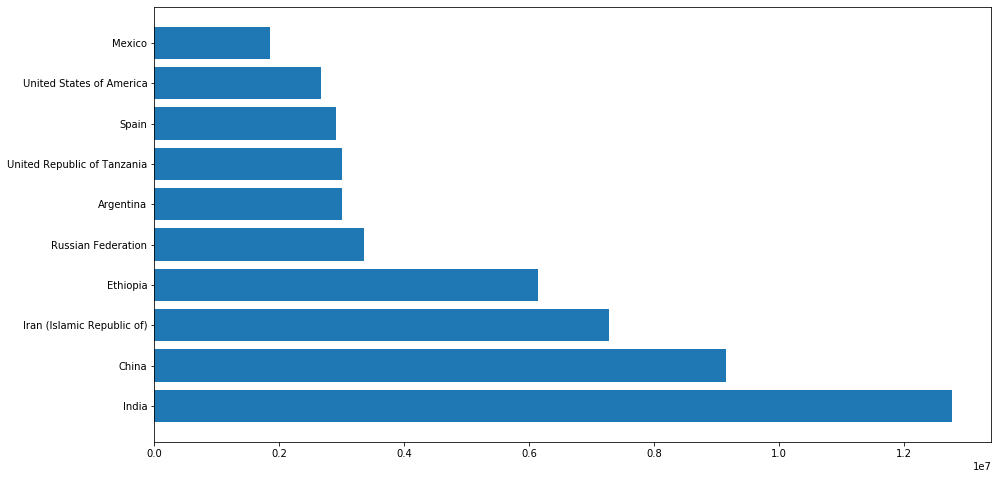

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['Area'], dff['Beehives'])

Text(1, 0.4, '2017')

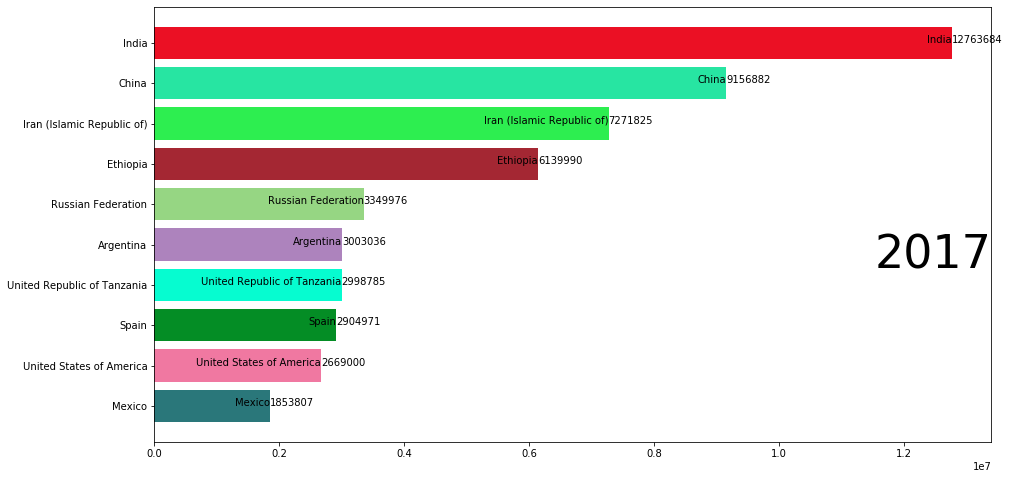

In [10]:
import random

fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['Area'], dff['Beehives'], color=["#%06x" % random.randint(0, 0xFFFFFF) for x in dff['Area']])

for i, (value, name) in enumerate(zip(dff['Beehives'], dff['Area'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i,     value,           ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

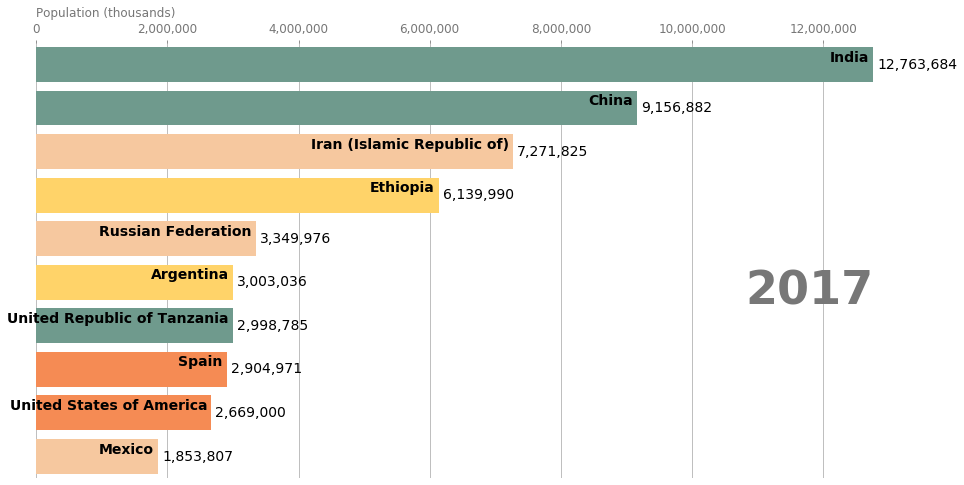

In [44]:
color_mapping = {}

colors = ['#015668', '#ffd369', '#698474', '#f8b195', '#90303d', '#018383', '#4a69bb', '#6c7b95', '#6c5b7b', 
          '#a35638', '#6f9a8d', '#6f9a8d', '#f6c89f', '#f6c89f', '#f58b54', '#f58b54', '#8186d5', ]

random.shuffle(colors)

for cnt, country in enumerate(beehives.Area.unique()):
    color_mapping[country] = colors[cnt % len(list(colors))]
    
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    dff = beehives[beehives['Year'].eq(year)].sort_values(by='Beehives', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Area'], dff['Beehives'], color=[color_mapping[x] for x in dff['Area']])
    dx = dff['Beehives'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Beehives'], dff['Area'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    plt.box(False)
    
draw_barchart(2017)

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


<IPython.core.display.HTML object>

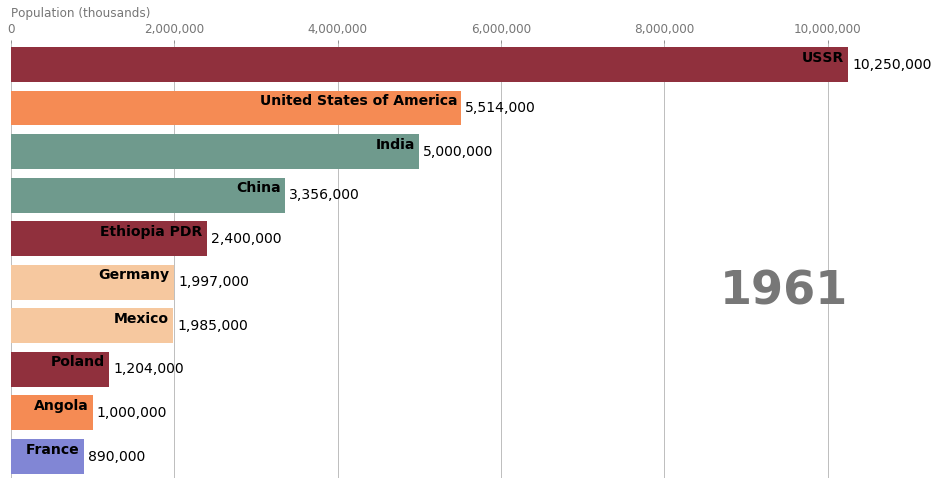

In [45]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(beehives.Year.min(), beehives.Year.max()+1), interval=350)
HTML(animator.save('race_chart7.gif')) 